In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [11]:
mll_results = pd.read_csv('../Spatial/MOB_final_results.csv', index_col=0)

In [2]:
import SpatialDE as sde

In [3]:
null_model_samples = 10000

In [18]:
sim_null_exp_tab = sde.base.simulate_const_model(mll_results.sample(null_model_samples), mll_results.loc[0, 'n'])

In [22]:
sample_info = pd.read_csv('../Spatial/MOB_sample_info.csv', index_col=0)

In [23]:
sample_info[['x', 'y']]

,x,y
16.92x9.015,16.920,9.015
16.945x11.075,16.945,11.075
16.97x10.118,16.970,10.118
16.939x12.132,16.939,12.132
16.949x13.055,16.949,13.055
16.942x15.088,16.942,15.088
16.941x17.065,16.941,17.065
16.919x16.055,16.919,16.055
9.862x9.024,9.862,9.024
12.08x9.115,12.080,9.115


In [ ]:
sde.dyn_de()

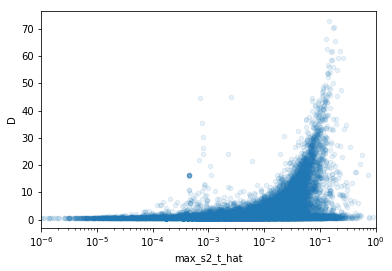

In [89]:
final.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-6, 1), alpha=.1);

In [439]:
null_lls = sim_results.query('model == "const"')[['g', 'max_ll']]
se_results = sim_results.query('model == "SE"')
se_results = se_results[se_results.groupby(['g'])['max_ll'].transform(max) == se_results['max_ll']]
sim_final = se_results.merge(null_lls, on='g',)
sim_final['D'] = sim_final['max_ll_x'] - sim_final['max_ll_y']

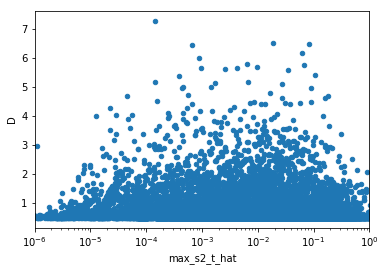

In [440]:
sim_final.plot('max_s2_t_hat', 'D', kind='scatter', logx=True, xlim=(1e-6, 1));

In [441]:
sim_final.shape

(10000, 13)

In [442]:
sim_final.shape

(10000, 13)

In [443]:
final.shape

(16218, 15)

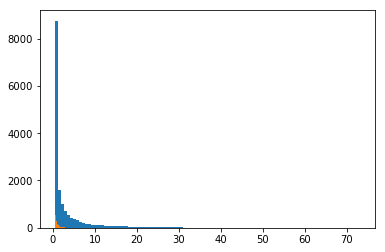

In [444]:
plt.hist(final.D, bins=100);
plt.hist(sim_final.D, bins=100);

In [445]:
sim_final.max()

g                     9999
max_delta          22026.5
max_ll_x              1952
max_mu_hat         2.30489
max_s2_t_hat       4.03274
n                      262
time            0.00485086
l                  20.5562
M                        4
model                   SE
BIC                1109.78
max_ll_y           1951.02
D                  7.29103
dtype: object

In [446]:
final.query('D > 8').shape

(1993, 15)

In [447]:
tmp = sim_final.D.sort_values().as_matrix()

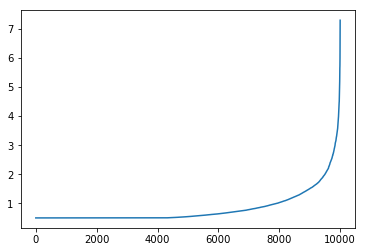

In [448]:
plt.plot(tmp)

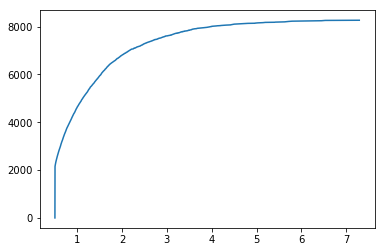

In [449]:
plt.plot(tmp, tmp.cumsum())

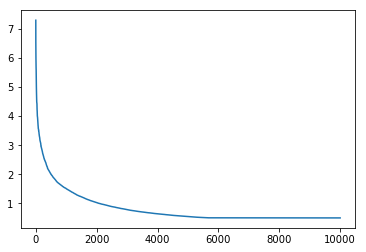

In [450]:
tmp = sim_final.D.sort_values(ascending=False).as_matrix()
plt.plot(tmp)

In [451]:
from scipy import stats

In [453]:
par = stats.gamma.fit(sim_final.D)
par

(0.35359000155182962, 0.50095663334957397, 0.99251257936153703)

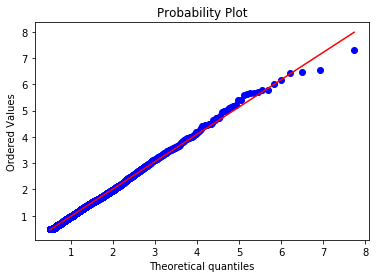

In [455]:
ax = plt.gca()
stats.probplot(tmp, dist=stats.gamma, sparams=par, plot=ax);

In [456]:
gamma_rv = stats.gamma(*par)

In [457]:
par

(0.35359000155182962, 0.50095663334957397, 0.99251257936153703)

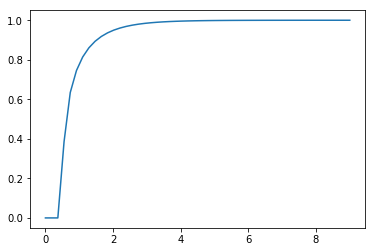

In [458]:
xx = np.linspace(0, 9)
plt.plot(xx, gamma_rv.cdf(xx))

In [459]:
gamma_rv.sf(sim_final.D.max())

0.00011288494246776876

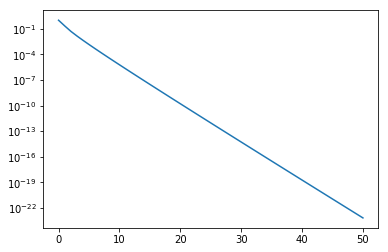

In [460]:
xx = np.linspace(0, 50)
plt.plot(xx, gamma_rv.sf(xx))
plt.yscale('log');

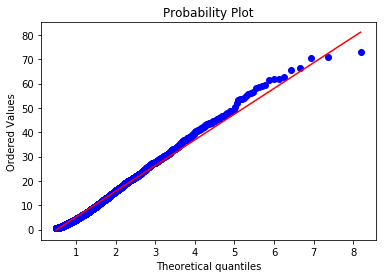

In [461]:
ax = plt.gca()
stats.probplot(final.D, dist=stats.gamma, sparams=par, plot=ax);

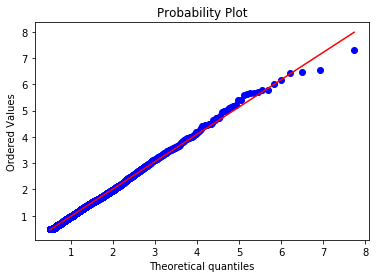

In [462]:
ax = plt.gca()
stats.probplot(sim_final.D, dist=stats.gamma, sparams=par, plot=ax);

In [463]:
final['pval'] = gamma_rv.sf(final['D'])

In [464]:
final['qval'] = final['pval'] * final.shape[0]
final['qval'] = final['qval'].map(lambda p: p if p < 1. else 1)

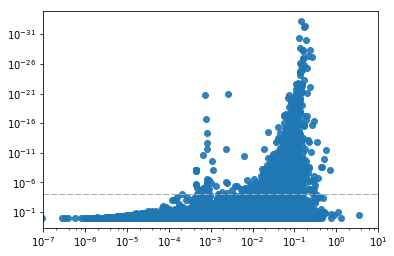

In [465]:
plt.xscale('log')
plt.yscale('log');
plt.scatter(final.max_s2_t_hat, final.pval, alpha=0.9)
plt.xlim(1e-7, 1e1);
plt.gca().invert_yaxis();
plt.axhline(1e-4, lw=1, ls='--', c='darkgrey');

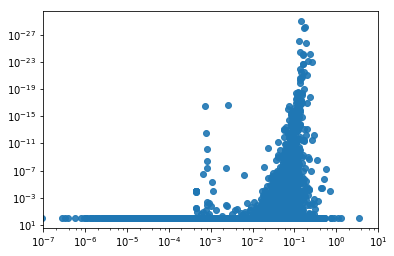

In [466]:
plt.xscale('log')
plt.yscale('log');
plt.scatter(final.max_s2_t_hat, final.qval, alpha=0.9)
plt.xlim(1e-7, 1e1);
plt.gca().invert_yaxis();

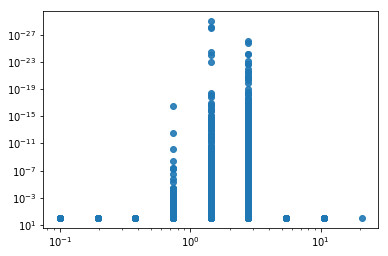

In [467]:
plt.xscale('log')
plt.yscale('log');
plt.scatter(final.l, final.qval, alpha=0.9)
plt.gca().invert_yaxis();

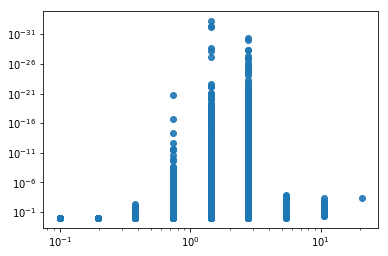

In [469]:
plt.xscale('log')
plt.yscale('log');
plt.scatter(final.l, final.pval, alpha=0.9)
plt.gca().invert_yaxis();

In [468]:
final.query('qval < 0.05').shape

(1453, 15)

In [27]:
null_lls = sim_results.query('model == "const"')[['g', 'max_ll']]
bic_results = sim_results[sim_results.groupby(['g'])['BIC'].transform(min) == sim_results['BIC']]
sim_final = bic_results.merge(null_lls, on='g',)
sim_final['D'] = sim_final['max_ll_x'] - sim_final['max_ll_y']

In [29]:
sim_final.model.value_counts()

const    100
Name: model, dtype: int64

In [6]:
for i, params in enumerate(tmp.iterrows()):
    params = params[1]
    pass

In [7]:
i, params

(4, g                      Cul1
 max_delta           1.08905
 max_ll_x           -64.4554
 max_mu_hat         0.596974
 max_s2_t_hat       0.133965
 n                       262
 time            0.000527859
 l                  0.736806
 M                         4
 model                    SE
 BIC                 151.184
 max_ll_y           -74.1626
 D                   9.70714
 Name: 13104, dtype: object)

In [8]:
params.max_mu_hat

0.5969740858654413

In [474]:
N = 262
O = np.ones(N)
I = np.eye(N)

In [475]:
mu = 2.0
s2_e = 2.3

In [480]:
%%timeit
mu = np.random.uniform(0., 5.)
s2_e = random.uniform(1e-3, 1e3);
np.random.multivariate_normal(mu * O, s2_e * I)

100 loops, best of 3: 5.75 ms per loop


In [482]:
%%timeit
mu = np.random.uniform(0., 5.)
s2_e = random.uniform(1e-3, 1e3);
stats.multivariate_normal.rvs(mu * O, s2_e * I)

100 loops, best of 3: 5.91 ms per loop


In [486]:
%%timeit
mu = np.random.uniform(0., 5.)
s2_e = random.uniform(1e-3, 1e3);
np.random.normal(mu, s2_e, N)

The slowest run took 25.59 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 11.1 µs per loop


In [487]:
%%timeit
mu = np.random.uniform(0., 5.)
s2_e = random.uniform(1e-3, 1e3);
stats.norm.rvs(mu, s2_e, N)

The slowest run took 7.80 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 51.6 µs per loop
